In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [47]:
data = pd.read_csv('./영등포구 부동산 실거래가 정보.csv')

C:\Users\406\AppData\Local\Temp\ipykernel_18396\1903171583.py:1: DtypeWarning: Columns (15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./영등포구 부동산 실거래가 정보.csv')


In [18]:
data.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명'],
      dtype='object')

In [24]:
data.head(3)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11560,영등포구,10800,영등포동7가,1.0,대지,46.0,1.0,경남아너스빌,...,99750,84.93,0.0,14.0,NaN,NaN,1998.0,아파트,직거래,NaN
1,2024,11560,영등포구,11000,여의도동,1.0,대지,50.0,0.0,시범,...,270000,118.12,0.0,2.0,NaN,NaN,1971.0,아파트,중개거래,서울 영등포구
2,2024,11560,영등포구,11700,당산동,1.0,대지,121.0,130.0,리버뷰,...,13650,15.05,0.0,8.0,NaN,NaN,2015.0,아파트,중개거래,서울 영등포구


In [26]:
data.isna().sum()

접수연도                     0
자치구코드                    0
자치구명                     0
법정동코드                    0
법정동명                     0
지번구분                  9576
지번구분명                 9576
본번                    9576
부번                    9576
건물명                   9576
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)              40634
층                     9576
권리구분                102294
취소일                 103479
건축년도                   346
건물용도                     0
신고구분                 95621
신고한 개업공인중개사 시군구명     97710
dtype: int64

In [30]:
data.fillna('', inplace=True)
data.isna().sum()

접수연도                0
자치구코드               0
자치구명                0
법정동코드               0
법정동명                0
지번구분                0
지번구분명               0
본번                  0
부번                  0
건물명                 0
계약일                 0
물건금액(만원)            0
건물면적(㎡)             0
토지면적(㎡)             0
층                   0
권리구분                0
취소일                 0
건축년도                0
건물용도                0
신고구분                0
신고한 개업공인중개사 시군구명    0
dtype: int64

In [43]:
data['계약일'].dtype

dtype('<M8[ns]')

In [51]:
data['계약일']= pd.to_datetime(data['계약일'].astype(str), format='%Y%m%d')

In [52]:
data['계약일']

0        2024-07-19
1        2024-07-19
2        2024-07-19
3        2024-07-18
4        2024-07-17
            ...    
104320   2006-01-02
104321   2006-01-02
104322   2006-01-02
104323   2006-01-02
104324   2006-01-01
Name: 계약일, Length: 104325, dtype: datetime64[ns]

In [53]:
pd.to_datetime(data['계약일'].astype(str), format='%Y%m%d')

In [55]:
# data['연도'] = data['계약일'].dt.year
# data['월'] = data['계약일'].dt.month

In [116]:
# 날짜 관련 컬럼 처리
data['계약일'] = pd.to_datetime(data['계약일'])
data['계약_연도'] = data['계약일'].dt.year
data['계약_월'] = data['계약일'].dt.month
data['계약_일'] = data['계약일'].dt.day
data['계약_요일'] = data['계약일'].dt.weekday  # 요일 추가 (0: 월요일, 6: 일요일)

In [56]:
data.head(2)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,연도,월
0,2024,11560,영등포구,10800,영등포동7가,1.0,대지,46.0,1.0,경남아너스빌,...,0.0,14.0,NaN,NaN,1998.0,아파트,직거래,NaN,2024,7
1,2024,11560,영등포구,11000,여의도동,1.0,대지,50.0,0.0,시범,...,0.0,2.0,NaN,NaN,1971.0,아파트,중개거래,서울 영등포구,2024,7


plt.figure(num, figsize, dpi, facecolor, edgecolor, frameon)

num: 그림(figure)의 번호를 지정합니다. 이 매개변수를 사용하여 이미 생성된 그림의 번호를 지정하거나, 번호를 지정하지 않으면 자동으로 그림 번호가 부여됩니다.<br>figsize: 그림의 크기를 지정합니다. (가로 크기, 세로 크기) 형태의 튜플로 값을 지정하며, 단위는 인치입니다. 예를 들어, figsize=(8, 6)은 가로 8인치, 세로 6인치 크기의 그림을 생성합니다.<br>dpi: 그림의 해상도를 지정합니다. 인치당 도트 수로 해상도를 설정하며, 기본값은 100입니다.<br>facecolor: 그림의 배경색을 지정합니다. 색상을 지정하는 문자열이나 RGB 튜플을 사용할 수 있습니다.<br>edgecolor: 그림의 테두리 색을 지정합니다. 색상을 지정하는 문자열이나 RGB 튜플을 사용할 수 있습니다.<br>frameon: 그림의 테두리를 그릴지 여부를 결정합니다. 기본값은 True로 테두리를 그리며, False로 설정하면 테두리를 그리지 않습니다.
출처: https://lifelong-education-dr-kim.tistory.com/entry/Matplotlib-모듈인-pyplot의-기본-함수-figure의-사용 [독학하는 김박사:티스토리]

In [57]:
year_avg_price = data.groupby('연도')['물건금액(만원)'].mean().reset_index()
year_avg_price

,연도,물건금액(만원)
0,2006,30943.354312
1,2007,25632.796684
2,2008,30571.844373
3,2009,38004.478576
4,2010,36258.068216
5,2011,37082.973418
6,2012,32116.178954
7,2013,35788.893884
8,2014,36420.760128
9,2015,39644.372064


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pyla

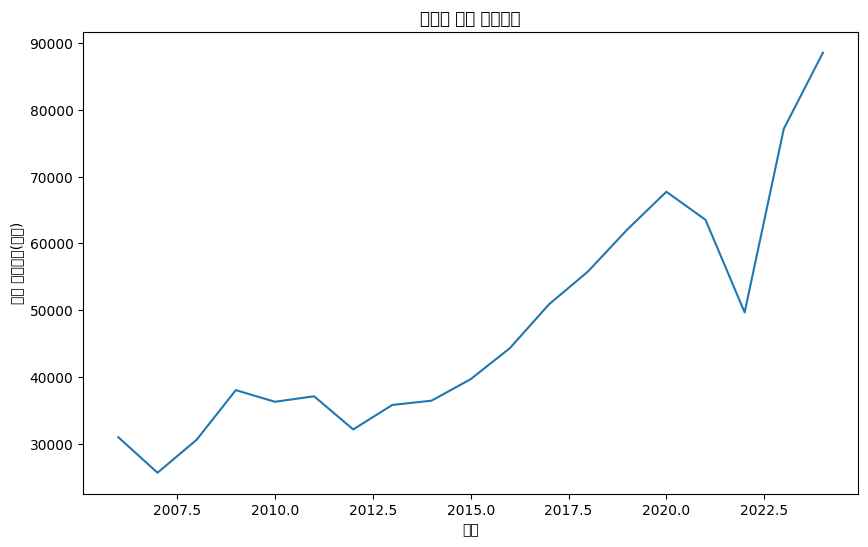

In [59]:
# 1. 연도별 평균 물건금액 시각화
plt.figure(figsize=(10, 6))
sb.lineplot(x='연도', y='물건금액(만원)', data=yearly_avg_price)
plt.title('연도별 평균 물건금액')
plt.xlabel('연도')
plt.ylabel('평균 물건금액(만원)')
plt.show()

In [113]:
# 필요한 컬럼만 선택
columns = ['접수연도', '자치구코드', '법정동코드', '지번구분', '본번', '부번', '계약일', '물건금액(만원)', '건물면적(㎡)', 
           '토지면적(㎡)', '층', '건축년도', '건물용도']

In [64]:
district_avg_price = data.groupby('법정동명')['물건금액(만원)'].mean().sort_values().reset_index()
district_avg_price

,법정동명,물건금액(만원)
0,영등포동1가,17374.833685
1,영등포동3가,19671.778902
2,영등포동2가,23091.555556
3,양평동2가,23628.214980
4,영등포동4가,24064.581349
5,당산동6가,30369.050299
6,양평동4가,31648.712515
7,문래동6가,33923.998278
8,양평동6가,34007.245889
9,문래동5가,34167.341891


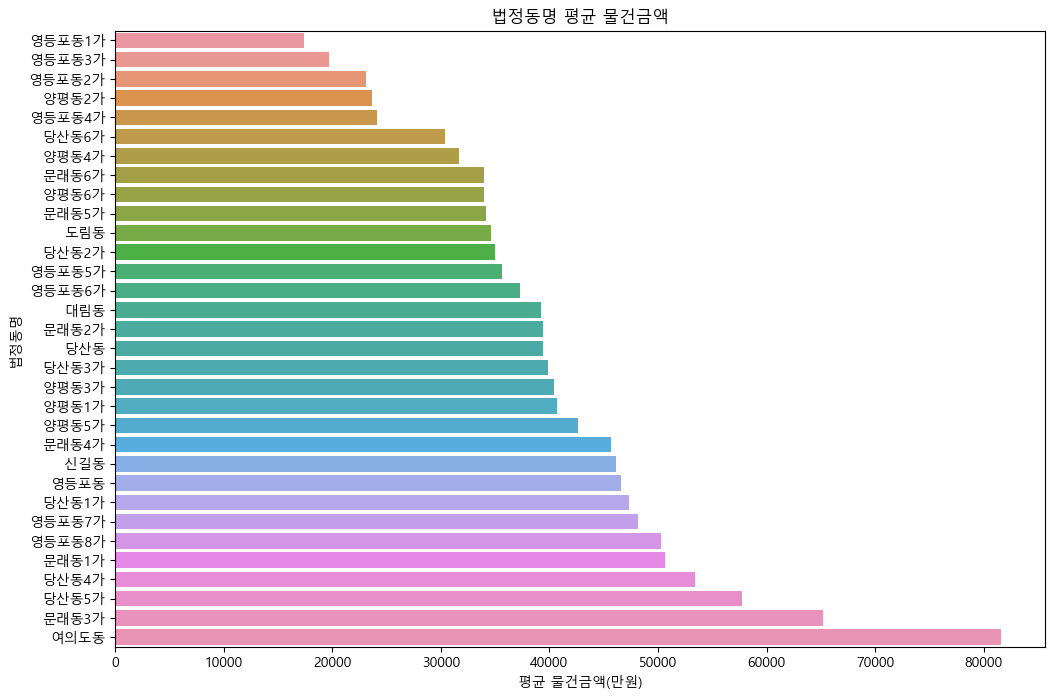

In [67]:
# 2. 자치구별 평균 물건금액 시각화
plt.figure(figsize=(12, 8))
district_avg_price = data.groupby('법정동명')['물건금액(만원)'].mean().sort_values().reset_index()
sb.barplot(x='물건금액(만원)', y='법정동명', data=district_avg_price)
plt.title('법정동명 평균 물건금액')
plt.xlabel('평균 물건금액(만원)')
plt.ylabel('법정동명')
plt.show()

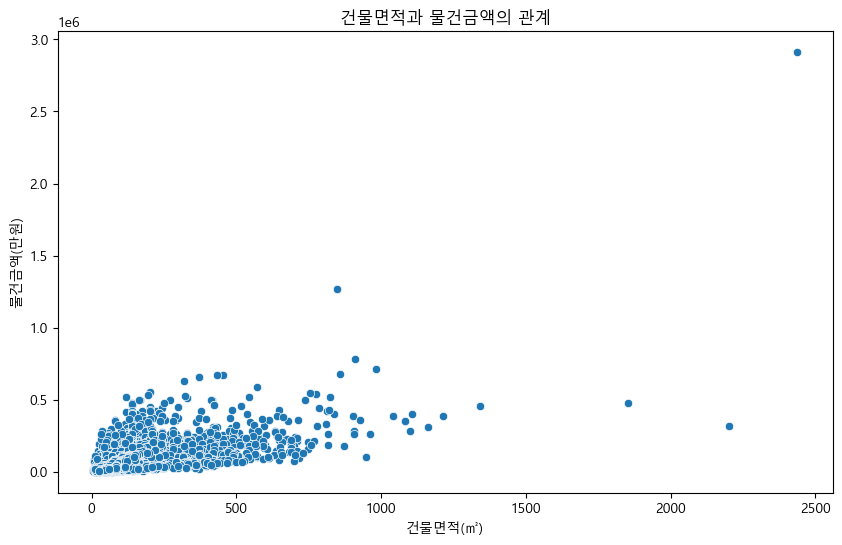

In [68]:
# 3. 건물면적과 물건금액의 관계 시각화
plt.figure(figsize=(10, 6))
sb.scatterplot(x='건물면적(㎡)', y='물건금액(만원)', data=data)
plt.title('건물면적과 물건금액의 관계')
plt.xlabel('건물면적(㎡)')
plt.ylabel('물건금액(만원)')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


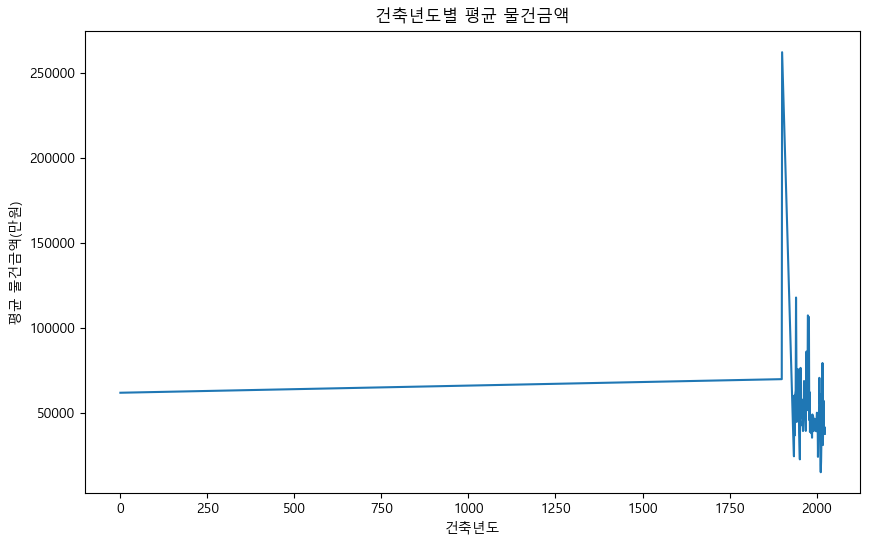

In [70]:
# 4. 건축년도별 평균 물건금액 시각화
plt.figure(figsize=(10, 6))
year_built_avg_price = data.groupby('건축년도')['물건금액(만원)'].mean().reset_index()
sb.lineplot(x='건축년도', y='물건금액(만원)', data=year_built_avg_price)
plt.title('건축년도별 평균 물건금액')
plt.xlabel('건축년도')
plt.ylabel('평균 물건금액(만원)')
plt.show()

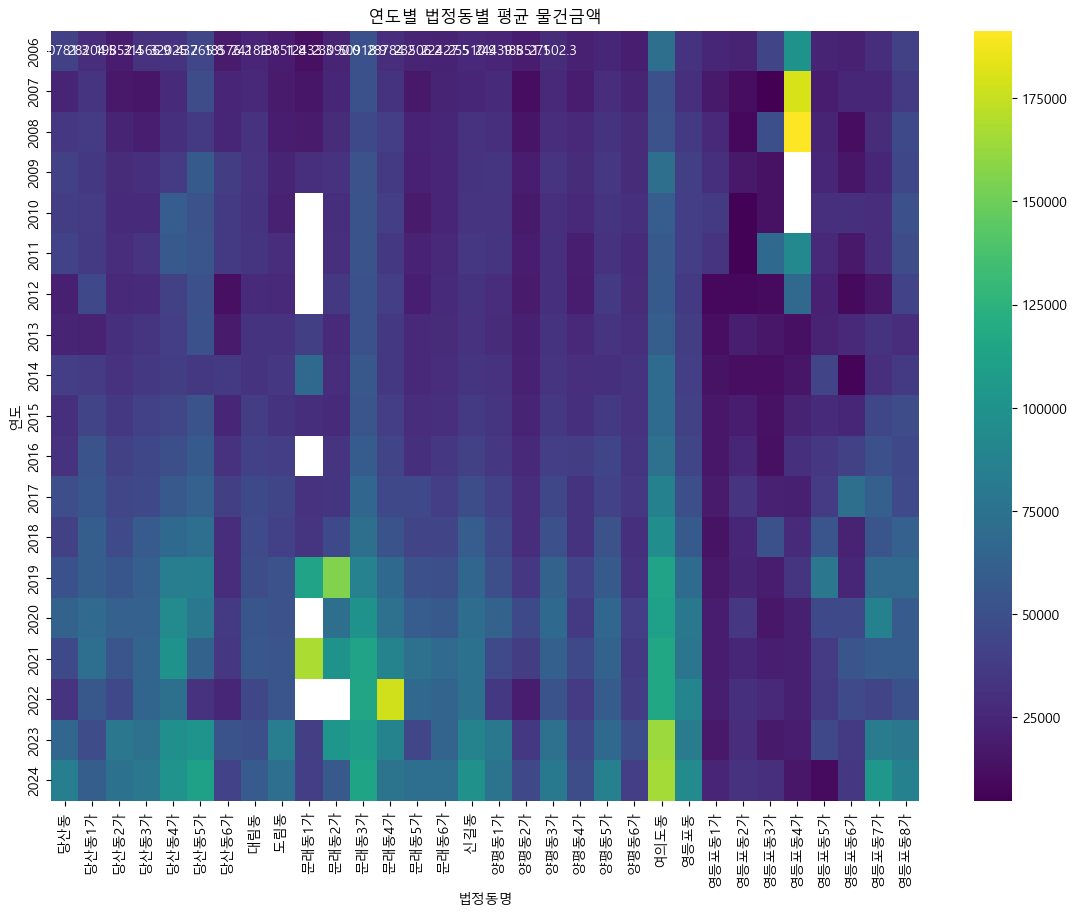

In [72]:
# 5. 연도별 자치구별 평균 물건금액 시각화
plt.figure(figsize=(14, 10))
pivot_data = data.pivot_table(values='물건금액(만원)', index='연도', columns='법정동명', aggfunc='mean')
sb.heatmap(pivot_data, cmap='viridis', annot=True, fmt=".1f")
plt.title('연도별 법정동별 평균 물건금액')
plt.xlabel('법정동명')
plt.ylabel('연도')
plt.show()

In [115]:
# 결측치 처리
data.dropna(inplace=True)

In [117]:
# 숫자형 변수로 변환
data['건물용도'] = data['건물용도'].astype('category').cat.codes

In [120]:
# 필요 없는 컬럼 제거
data.drop(['계약일'], axis=1, inplace=True)

In [121]:
# 로그 변환된 타겟 변수
data['log_물건금액(만원)'] = np.log1p(data['물건금액(만원)'])

In [122]:
# 특성과 타겟 변수 분리
X = data.drop(['물건금액(만원)', 'log_물건금액(만원)'], axis=1)
y = data['log_물건금액(만원)']

In [123]:
# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [127]:
# 테스트 데이터로 모델 평가
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # 지수 변환으로 원래 스케일로 복원

In [128]:
# 예측 금액이 음수가 되지 않도록 수정
y_pred = np.maximum(y_pred, 0)

In [129]:
mae = mean_absolute_error(np.expm1(y_test), y_pred)
mse = mean_squared_error(np.expm1(y_test), y_pred)
rmse = mean_squared_error(np.expm1(y_test), y_pred, squared=False)
r2 = r2_score(np.expm1(y_test), y_pred)

In [130]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 2793.994310191189
MSE: 36195941.25137401
RMSE: 6016.306279717981
R2 Score: 0.9770819192404173


In [141]:
# 물가 상승률 계산 함수
def get_inflation_rate(base_year, target_year):
    annual_increase = 0.02
    years_elapsed = target_year - base_year
    return (1 + annual_increase) ** years_elapsed - 1

In [151]:
# 다양한 날짜로 예측하기 위한 함수
def predict_price(year, month, day, weekday, model, scaler):
    new_data = pd.DataFrame({
        '접수연도': [year],
        '자치구코드': [11110],
        '법정동코드': [1111010100],
        '지번구분': [1],
        '본번': [50],
        '부번': [0],
        '계약_연도': [year],
        '계약_월': [month],
        '계약_일': [day],
        '계약_요일': [weekday],
        '건물면적(㎡)': [150.5],
        '토지면적(㎡)': [60.0],
        '층': [10],
        '건축년도': [2010],
        '건물용도': [0]  # 숫자형 변수로 변환된 값
    })

# 기존 데이터와 동일하게 전처리 (컬럼 순서를 명확히)
    new_data = new_data[X.columns]
    new_data_scaled = scaler.transform(new_data)
    predicted_price_log = model.predict(new_data_scaled)
    predicted_price = np.expm1(predicted_price_log)
    predicted_price = np.maximum(predicted_price, 0)
    base_year = 2023
    inflation_rate = get_inflation_rate(base_year, year)
    adjusted_price = predicted_price * (1 + inflation_rate)

    return adjusted_price[0]

In [152]:
# 다양한 날짜로 예측
predicted_price_2024_07_15 = predict_price(2024, 7, 15, 0, model, scaler)  # 월요일
predicted_price_2025_01_01 = predict_price(2025, 1, 1, 2, model, scaler)  # 수요일
predicted_price_2027_01_01 = predict_price(2027, 1, 1, 6, model, scaler)  # 토요일

In [153]:
print(f"Predicted price for 2024-07-15: {predicted_price_2024_07_15:.2f} 만원")
print(f"Predicted price for 2025-01-01: {predicted_price_2025_01_01:.2f} 만원")
print(f"Predicted price for 2027-01-01: {predicted_price_2027_01_01:.2f} 만원")

Predicted price for 2024-07-15: 82622.34 만원
Predicted price for 2025-01-01: 84274.79 만원
Predicted price for 2027-01-01: 87679.49 만원


In [161]:
import os

In [163]:
os.makedirs('predict')

In [164]:
import joblib

In [165]:
joblib.dump(model, './predict/forestRegressor.pkl')

['./predict/forestRegressor.pkl']

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 데이터 로드
data = pd.read_csv('apartment_sales_data.csv')

# 필요한 컬럼만 선택
columns = ['접수연도', '자치구코드', '법정동코드', '지번구분', '본번', '부번', '계약일', '물건금액(만원)', '건물면적(㎡)', 
           '토지면적(㎡)', '층', '건축년도', '건물용도']
data = data[columns]

# 결측치 처리
data.dropna(inplace=True)

# 날짜 관련 컬럼 처리
data['계약일'] = pd.to_datetime(data['계약일'])
data['계약_연도'] = data['계약일'].dt.year
data['계약_월'] = data['계약일'].dt.month
data['계약_일'] = data['계약일'].dt.day
data['계약_요일'] = data['계약일'].dt.weekday  # 요일 추가 (0: 월요일, 6: 일요일)

# 숫자형 변수로 변환
data['건물용도'] = data['건물용도'].astype('category').cat.codes

# 필요 없는 컬럼 제거
data.drop(['계약일'], axis=1, inplace=True)

# 로그 변환된 타겟 변수
data['log_물건금액(만원)'] = np.log1p(data['물건금액(만원)'])

# 특성과 타겟 변수 분리
X = data.drop(['물건금액(만원)', 'log_물건금액(만원)'], axis=1)
y = data['log_물건금액(만원)']

# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # 지수 변환으로 원래 스케일로 복원

# 예측 금액이 음수가 되지 않도록 수정
y_pred = np.maximum(y_pred, 0)

mae = mean_absolute_error(np.expm1(y_test), y_pred)
mse = mean_squared_error(np.expm1(y_test), y_pred)
rmse = mean_squared_error(np.expm1(y_test), y_pred, squared=False)
r2 = r2_score(np.expm1(y_test), y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# 다양한 날짜로 예측하기 위한 함수
def predict_price(year, month, day, weekday, model, scaler):
    new_data = pd.DataFrame({
        '접수연도': [year],
        '자치구코드': [11110],
        '법정동코드': [1111010100],
        '지번구분': [1],
        '본번': [100],
        '부번': [0],
        '계약_연도': [year],
        '계약_월': [month],
        '계약_일': [day],
        '계약_요일': [weekday],
        '건물면적(㎡)': [84.5],
        '토지면적(㎡)': [60.0],
        '층': [10],
        '건축년도': [2010],
        '건물용도': [0]  # 숫자형 변수로 변환된 값
    })

    # 기존 데이터와 동일하게 전처리 (컬럼 순서를 명확히)
    new_data = new_data[X.columns]

    # 스케일링 적용
    new_data_scaled = scaler.transform(new_data)

    # 모델을 사용하여 예측
    predicted_price_log = model.predict(new_data_scaled)
    predicted_price = np.expm1(predicted_price_log)  # 지수 변환으로 원래 스케일로 복원

    # 예측 금액이 음수가 되지 않도록 수정
    predicted_price = np.maximum(predicted_price, 0)

    # 물가 상승률 반영 (예시 물가 상승률 데이터 사용)
    inflation_rates = {
        2023: 0.02,
        2024: 0.025
    }
    base_year = 2023

    if base_year in inflation_rates and year in inflation_rates:
        inflation_adjustment = (1 + inflation_rates[year]) / (1 + inflation_rates[base_year])
        adjusted_price = predicted_price * inflation_adjustment
    else:
        adjusted_price = predicted_price  # 물가 상승률 데이터가 없는 경우 조정하지 않음

    return adjusted_price[0]

# 다양한 날짜로 예측
predicted_price_2024_07_15 = predict_price(2024, 7, 15, 0, model, scaler)  # 월요일
predicted_price_2024_12_25 = predict_price(2024, 12, 25, 2, model, scaler)  # 수요일 (예시)
predicted_price_2025_01_01 = predict_price(2025, 1, 1, 3, model, scaler)  # 목요일 (예시)

print(f"Predicted price for 2024-07-15: {predicted_price_2024_07_15:.2f} 만원")
print(f"Predicted price for 2024-12-25: {predicted_price_2024_12_25:.2f} 만원")
print(f"Predicted price for 2025-01-01: {predicted_price_2025_01_01:.2f} 만원")
